# Multiclass classification

We've just solved a binary classification problem. What about a multiclass one?

### Exercise Objectives:
- Write a Neural Network for multiclass classification
- Observe overfitting during the model convergence

# 1. Create the data


The `make_blob` function [(see documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) enables to draw : 
- an arbitrary number of data sample, argument `n_samples`
- an arbitrary number of features per data sample, argument `n_features`
- an arbitrary number of categories, argument `centers`
- a distance between the categories, argument `cluster_std`

There is also the `random_state` argument that allows to draw the data deterministically, in order to reproduce the same data. Two persons that choose the same random_state will have the same data.

❓ **Question** ❓ Based on the documentation, generate data with : 
- 1200 samples
- 8 features per sample
- 7 categories of data
- 8 as the distance between the categories

Select a `random_state` equal to 1.

Print the shape and check that it corresponds to (1200, 8) for `X` and (1200) for `y`

In [1]:
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=1200, 
                  centers=7, 
                  n_features=8,
                  cluster_std=8,
                  random_state=1)

In [3]:
X.shape, y.shape

((1200, 8), (1200,))

❓ **Question** ❓ Thanks to matplotlib, scatter plot two (arbitrary) dimensions of the input data together. Each dot should be colored by the category it belongs to.

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

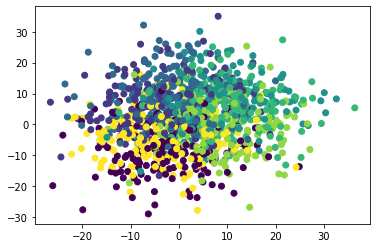

In [5]:
plt.scatter(X[:, 0], X[:, 5], c=y);

❓ **Question** ❓ Repeat the operation on other dimensions, to visualy that the data are not easily separable

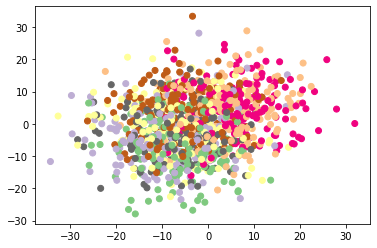

In [6]:
plt.scatter(X[:, 4], X[:, 7], c=y, cmap='Accent_r');

As for now, `y` is the list of integers, each correspoding to the category of the related input data.
It looks like `[3, 2, 2, 3, 0, 5, 1, 1, 0, 5, ...]` (in this example, we have 7 categories, from 0 to 6).

However, for categorical task in Keras, the **output should have a number of columns equal to the number of different categories**. Each row, corresponding to an input data, is a list of the probabilities that this input belongs to the corresponding category. As here, the probabilities to belong to each category is equal to 1, it should look like

```
[
[0, 0, 0, 1, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[1, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 1, 0], 
[0, 1, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1],
...
]
```

Each column corresponds to a category. Each row corresponds to a target, the 1 being the category the input data belongs to.

To transform `y` to categories, use `to_categorical` function from Keras . 


❓ **Question** ❓ First print `y`, then apply it and store it into `y_cat` and reprint `y_cat` to see the new structure.

In [7]:
y

array([2, 2, 5, ..., 1, 3, 0])

In [8]:
from tensorflow.keras.utils import to_categorical
y_cat = to_categorical(y, num_classes=7)

In [9]:
y_cat.shape

(1200, 7)

❓ **Question** ❓ Split the dataset $X$ and $y_{cat}$  into a train and test set (size: 70/30%)

Remark : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3)

In deep learning, the data should always be standard-scaled, so as to lay _approximately_ in [-1, 1]. (We will see later why).

❓ **Question** ❓ Fit a sklearn [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) on the train set and transform both your train and test set.

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-0.04584469, -0.94132569, -0.15555969, ..., -1.87128868,
         0.73711168, -0.90737229],
       [ 0.69751586, -1.02509907,  0.27608369, ..., -1.3922614 ,
         1.9914565 , -0.60197545],
       [-2.55683327,  0.39061523, -0.41274746, ...,  1.09167428,
        -0.08593071,  2.53704583],
       ...,
       [-0.38592091, -0.08374277,  0.55802806, ..., -1.114497  ,
         0.65391386, -0.31576458],
       [ 0.83248317,  1.02983299, -0.50632638, ...,  0.55398493,
         1.23978462, -1.90563735],
       [ 0.51052511,  0.23899631, -1.17923504, ..., -1.31060849,
        -0.69482131, -1.0390371 ]])

❓ **Question** ❓ Complete the following function to initialize a model that has 
- a first layer with 50 neurons (activation being `relu` and appropriate input dimension)
- a output layer designed for a multiclassification task which outputs probabilities for each class

In [12]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [13]:
def initialize_model():
    
    ### Model architecture
    model = models.Sequential()
    
    model.add(layers.Dense(50, activation='relu', input_dim=8))

    model.add(layers.Dense(7, activation='softmax'))
    
    ### Model optimization : Optimizer, loss and metric 
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model 

### Note here that the loss is different!
### This is because the task is not with two categories only, therefore
### the solver is somehow different (will see it tomorrow)

model = initialize_model()

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                450       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 357       
Total params: 807
Trainable params: 807
Non-trainable params: 0
_________________________________________________________________


❓ **Question** ❓ How many parameters (a.k.a. weights) are there in the model? How many a logistic regression would have had with the same data?

In [15]:
total_params = 807
total_params_log_reg = 8+1   # (ML simple Log Reg)

❓ **Question** ❓ Fit your model onto the train data with 50 epochs and plot the history

In [16]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    verbose=0) # Try different verbose

In [17]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

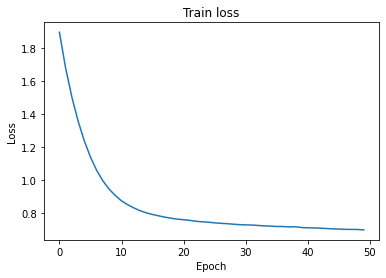

In [18]:
plot_history(history)

❓ **Question** ❓ Evaluate your model on the test set and print the accuracy

In [19]:
model.evaluate(X_test, y_test, verbose=0)

[0.8929698467254639, 0.699999988079071]

❓ **Question** ❓ Is this a good score? You should compare it to some sort of benchmark value. In this case, what score would a random guess give?

In [20]:
# 0.69 seems to be a bad score since it is much greater than the baseline score of 1/7 = 0.14

In [21]:
1/7

0.14285714285714285

In [22]:
accuracy_baseline = 1/7

In [23]:
from nbresult import ChallengeResult
result = ChallengeResult('baseline',
                         accuracy=accuracy_baseline)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.3, py-1.10.0, pluggy-0.13.1 -- /Users/smrack/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/smrack/code/olushO/data-challenges/06-Deep-Learning/01-Fundamentals-of-Deep-Learning/03-Multiclass-classification
plugins: anyio-2.2.0, dash-1.20.0
collecting ... collected 1 item

tests/test_baseline.py::TestBaseline::test_accuracy PASSED               [100%]

============================== 1 passed in 0.03s ===============================


💯 You can commit your code:

git add tests/baseline.pickle

git commit -m 'Completed baseline step'

git push origin master


❗ **Remark** ❗ Wait ... If you get a closer look at the plot of the loss, it seems that the loss was still decreasing after 50 epochs. Why stopping it so soon? Let's rerun the model (with the initialization first) with 1000 epochs and plot the history

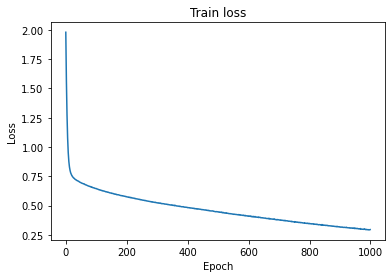

In [24]:
model = initialize_model()
history = model.fit(X_train, y_train, 
                    epochs=1000,
                    verbose=0) # Try different verbose
plot_history(history)

❓ **Question** ❓ 
- What can you say about the new loss? 
- Evaluate once again your model on the test set and print the accuracy

In [25]:
model.metrics_names

['loss', 'accuracy']

In [26]:
# The new loss is lower than the previous loss and it seems to keep going lower and lower ...
model.evaluate(X_test, y_test, verbose=0)

[1.7087585926055908, 0.6638888716697693]

❗ **Remark** ❗ On the one hand, the loss (computed on the train set) seems smaller than with 50 epochs. However, the accuracy on the test set got worse than before... 

❓ **Question** ❓ How is phenomenon called? 

In [27]:
# ===> overfitting

❗ **Remark** ❗ The overfitting occurs at some point during the iteration of the gradient descent, once the accuracy starts getting worse on the test set. Therefore, there is a need to stop the fitting at some point.

Let's see when does the test loss increases in practice. (Yes, we data-leak, we should create a validation set for that in reality...)

❓ **Question** ❓ Run the following command and plot the history

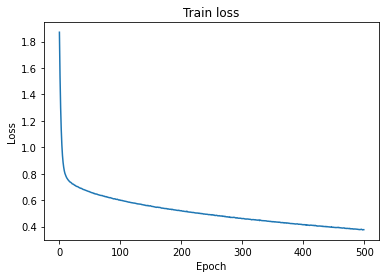

In [28]:
model = initialize_model()

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=500, 
                    batch_size=16,
                    verbose=0)
plot_history(history)

❓ **Question** ❓ Plot the values of the loss and accuracy on the train set (in blue) and on the test set (in orange). What can you comment on that?

In [29]:
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

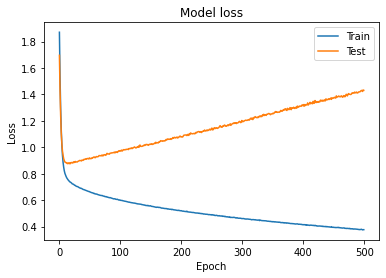

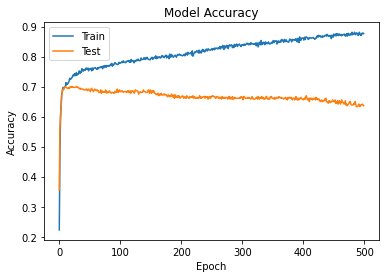

In [30]:
plot_loss_accuracy(history)

❓ **Question** ❓ Reproduce similar results by defining a more complex architecture that includes : 

- a first layer with 25 neurons 
- a second layer with 15 neurons
- a third layer with 10 neurons
- a final layer that outputs probability for each class



In [31]:
def initialize_model_2():
    
    model = models.Sequential()
    
    model.add(layers.Dense(25, activation='relu', input_dim=8))
    model.add(layers.Dense(15, activation='relu'))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(7, activation='softmax'))
    
    ### Model optimization : Optimizer, loss and metric 
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

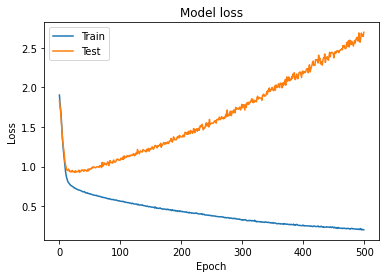

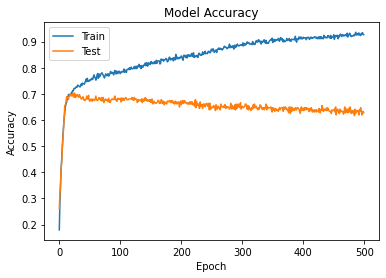

In [32]:
##############
### Answer ###
##############
model = initialize_model_2()

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=500, 
                    batch_size=16,
                    verbose=0)

plot_loss_accuracy(history)

❗ **Remark** ❗ 
- We clearly see that an overfitting can happend during the training. More in our next lecture
- The model overfits as the number of parameters is very very large (compare the number of weights with a logistic regression on the same data)

**🏁 Congratulation! Commit and push your notebook**